# 앙상블
## 배깅, 부스팅 방식  
### 배깅 방식: 랜덤 포레스트
### 부스팅 방식: 그래디언트 부스팅, XgBoost, LightGBM, 스태킹 기법

### 앙상블은 여러개의 약한 학습기(예-결정트리)를 결합해 계속해서 가중치를 업데이트 해 나가며 예측 성능을 향상시킨다

### 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것  
규칙노드: 규칙 조건  
리프노드: 결정된 클래스 값  
새로운 규칙 조건마다 서브 트리가 생성  
그러나 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음(과적합)  
데이터를 분류할 때 최대한 많은 데이터셋이 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 한다  
이를 위해 최대한 균일한 데이터셋을 구성할 수 있도록 분할하는 것이 필요

결정 노드는 정보 균일도가 높은 데이터셋을 먼저 선택할 수 있도록 규칙 조건을 만든다  
정보 균일도를 측정하는 대표적인 방법은 정보 이득 지수와 지니 계수가 있다  

정보 이득은 엔트로피 개념을 기반으로 한다  
정보 이득 지수 = 1 - 엔트로피 지수  
엔트로피: 주어진 데이터 집합의 혼잡도  
서로 다른 값이 섞여있으면 엔트로피가 높고 같은 값이 섞여있으면 엔트로피가 낮다  
결정 트리는 정보 이득 지수로 분할 기준을 결정한다  

지니 계수: 불평등 지수를 나타낼 때 사용하는 지수  
0이 가장 평등하고 1로 갈수록 불평등하다  
머신러닝에서는 지니 계수가 낮을수록 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

DecisionTreeClassifier는 기본적으로 지니계수를 이용해 데이터셋을 분할한다

결정 트리 장점: 쉽고 직관적, 전처리 작업의 불필요  
결정 트리 단점: 과적합으로 정확도가 떨어짐

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

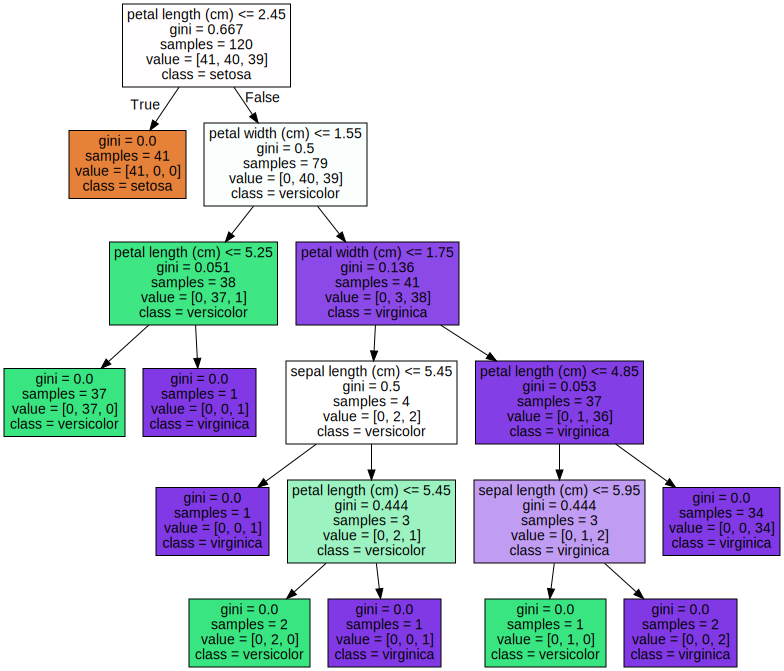

In [5]:
from sklearn.tree import export_graphviz
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
import graphviz
#위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

더 이상 자식이 없는 노드: 리프노드  
리프노드는 최종 클래스 값이 결정된 노드  
리프노드가 되려면 오직 하나의 클래스값으로 최종 데이터가 구성되거나 리프노드가 될 수 있는 하이퍼파라미터 조건을 충족해야 함  

자식 노드가 있는 노드: 브랜치노드, 자식노드를 만들기 위한 분할 규칙 조건을 가지고 있음

결정트리는 규칙 생성 로직을 미리 제어하지 않으면 매우 복잡한 규칙 트리가 만들어져 과적합 될 수 있다  

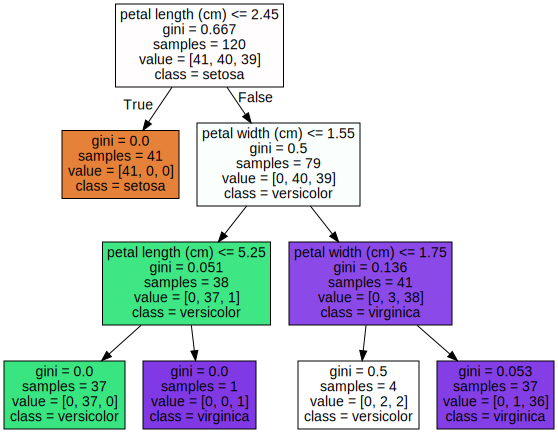

In [6]:
#max_depth = 3으로 지정

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, max_depth = 3)
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
#위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

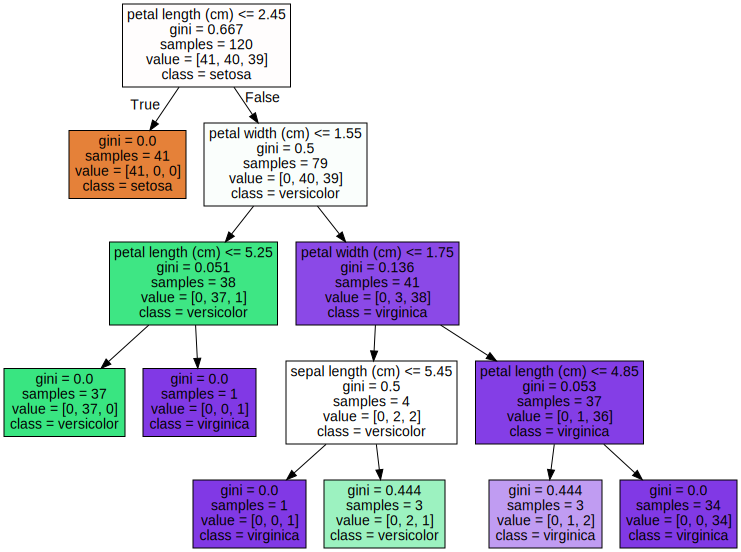

In [7]:
#min_samples_split = 4
#min_samples_split :  자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_split = 4)
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
#위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

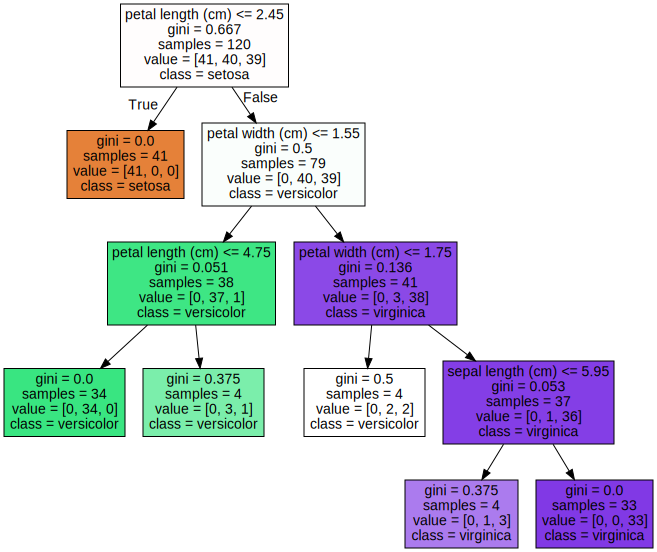

In [8]:
#min_samples_leaf = 3
#min_samples_leaf : 분할된 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수 지정
#왼쪽과 오른쪽 자식 노드 중 하나라도 min_samples_leaf보다 작은 데이터 건수를 가지게 되면 더 이상 분할 진행하지 않음
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_leaf = 4)
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)
#위에서 생성된 tree.dot파일을 graphviz가 읽어서 주피터노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier객체의 feature_importances_ 속성으로 제공

feature_importances_는 ndarray형태로 값을 반환하며 피처 순서대로 값이 할당됨  
일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미  

Feature importances: [0.006 0.    0.546 0.448]
sepal length (cm), 0.006
sepal width (cm), 0.000
petal length (cm), 0.546
petal width (cm), 0.448


<Axes: >

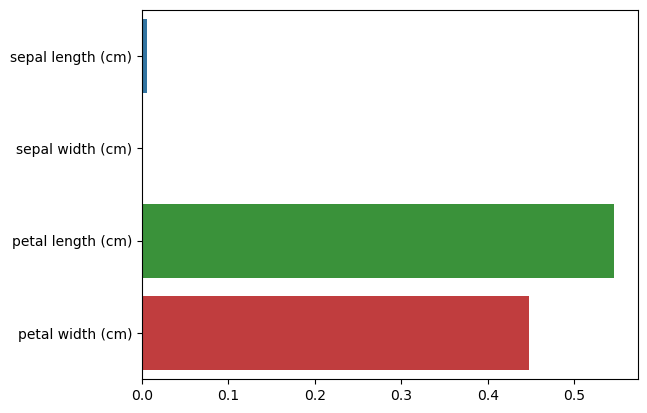

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f'Feature importances: {np.round(dt_clf.feature_importances_, 3)}')

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name}, {value:.3f}')

#feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

#여러 피처 중 petal_length가 가장 피처 중요도가 높음을 확인

### 결정 트리 과적합(overfitting)
make_classification(): 분류를 위한 테스트용 데이터셋을 쉽게 만들어 줌  
이를 이용해서 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터셋을 만들고 이를 그래프 형태로 시각화  
make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

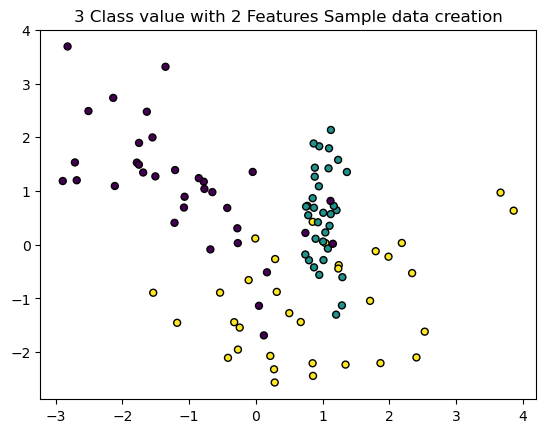

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class value with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

각 피처가 x축 y축으로 나열된 2차원 그래프  
3개의 클래스는 색으로 구분  
X_features와 y_labels 데이터셋을 기반으로 결정 트리 학습

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

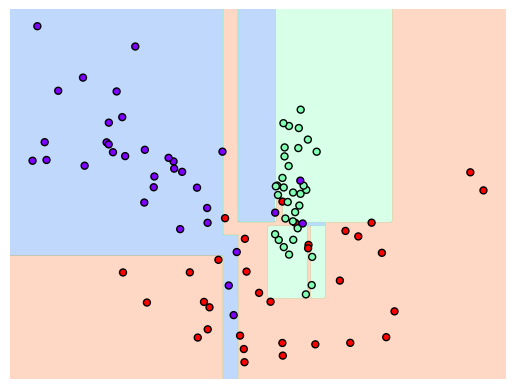

In [12]:
from sklearn.tree import DecisionTreeClassifier
#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐  
이렇게 복잡한 모델은 약간만 다른 형태의 데이터셋을 예측하면 예측 정확도가 떨어짐

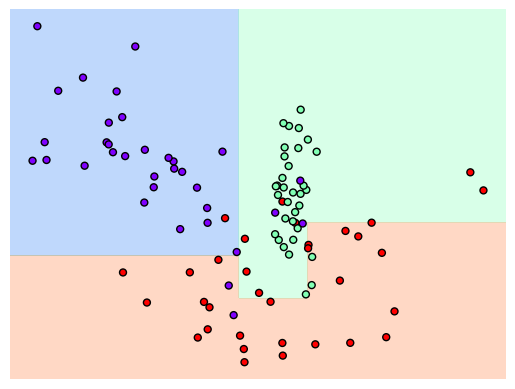

In [13]:
#min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

좀 더 일반화된 분류 규칙에 따라 분류

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                              header = None, names = ['column_index', 'column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [15]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [16]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [17]:
import pandas as pd
def get_human_dataset():
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                                  header = None, names = ['column_index','column_name'])
    #중복된 피처명을 수정하는 get_new_featre_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    #학습 피처 데이터세트와 테스트피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)

    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])

    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [18]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [19]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [21]:
#동작 예측 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 에측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도: {accuracy:.4f}')

#DecisionTreeClassifier의 하이퍼파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [22]:
#GridSearchCV 이용해 하이퍼 파라미터 변경
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [6,8,10,12,16,20,24],
          'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [23]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [24]:
max_depths = [6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth}, 정확도 : {accuracy:.4f}')

max_depth = 6, 정확도 : 0.8551
max_depth = 8, 정확도 : 0.8717
max_depth = 10, 정확도 : 0.8599
max_depth = 12, 정확도 : 0.8571
max_depth = 16, 정확도 : 0.8599
max_depth = 20, 정확도 : 0.8565
max_depth = 24, 정확도 : 0.8565


In [25]:
params = {
    'max_depth': [8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits



KeyboardInterrupt



In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f'결정 트리 예측 정확도: {accuracy:.4f}')

In [ ]:
import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_
#TOP 중요도로 정렬을 쉽게 하고 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
#중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()
#top5개의 피처들이 매우 중요하게 규칙 생성에 영향을 미침

## 앙상블 학습
여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법  
대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 보인다  
보팅, 배깅, 부스팅, 스태킹 ...  
보팅: 여러 개의 분류기(서로 다른 알고리즘)를 결합해 투표를 통해 최종 예측 결과 결정
  
배깅: 여러 개의 분류기(서로 같은 알고리즘)을 데이터 샘플링을 다르게 하며 학습을 수행해 보팅을 수행- 랜덤 포레스트  
배깅 앙상블: 여러 개의 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터셋에 대해 학습을 통해 예측을 수행한 결과를 보팅을 통해 최종 예측 결과 선정  
  
부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 다음 분류기에게 가중치를 부여하며 학습과 예측을 진행  
그래디언트부스트, XGBoost, LightGBM  

스태킹: 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과 예측

### 보팅 - 하드보팅, 소프트보팅
하드 보팅: 다수결 원칙과 비슷. 예측한 결괏값 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정  
소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정(일반적으로 적용)  

보팅 분류기: VotingClassifier  
로지스틱회귀와 KNN을 기반으로 보팅 분류기 생성

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

In [ ]:
#로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기
#주요 생성 인자: estimators, voting
#estimators: 리스트 값, 보팅에 사용될 여러개의 classifier객체를 튜플 형식으로 입력
#voting: 'hard'=하드보팅, 'soft'=소프트보팅 (기본=hard)

#개별 모델은 로지스틱회귀와 knn
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도: {accuracy_score(y_test, pred):.4f}')

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name}정확도: {accuracy_score(y_test, pred):.4f}')

### 랜덤 포레스트
배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘  
대표 알고리즘: 랜덤 포레스트  
결정 트리 기반으로 쉽고 직관적인 장점을 가지고 있음  
여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정  
개별 트리가 학습하는 데이터셋은 전체 데이터에서 일부가 중첩되게 샘플링된 데이터세트  
이렇게 여러 개의 데이터셋을 중첩되게 분리하는 것을 부트스트래핑 분할 방식 이라고 함  
랜덤포레스트의 subset데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어짐  
서브셋의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐  

이렇게 데이터가 중첩된 개별 데이터셋에 결정 트리 분류기를 각각 적용하는 것이 랜덤포레스트  
RandomForestClassifier 클래스를 통해 지원  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:', accuracy)

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
트리 기반 앙상블 알고리즘 단점: 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝 시간이 오래 걸린다  
GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}')

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16,
                                 min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(f'예측 정확도: {accuracy_score(pred, y_test):.4f}')

In [ ]:
#피처 정확도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### GBM(Gradient Boosting Machine)
부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식  

AdaBoost: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

GBM: 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이  
오류 값: 실제 값 - 예측값  
이 오류값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법  

In [27]:
#사이킷런의 GBM 이용해 예측 분류, 학습 시간 측정
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f'GBM 정확도: {gb_accuracy:.4f}')
print(f'GBM 수행시간 : {time.time() - start_time:.4f}')

GBM 정확도: 0.9393
GBM 수행시간 : 1445.6436


GBM 하이퍼 파라미터  
loss: 경사 하강법에서 사용할 비용 함수 지정  
learning_late: GBM이 학습을 진행할 때마다 적용하는 학습률  
n_estimators: weak learner의 개수  
subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율, 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정